<a href="https://colab.research.google.com/github/therealfortune/DA-Portfolio-Project/blob/master/MovieCorellationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT LIBRARIES

import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize']


[6.0, 4.0]

Reading the data

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/movies.csv')
df.head()

name  ... runtime
0                                     The Shining  ...   146.0
1                                 The Blue Lagoon  ...   104.0
2  Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                       Airplane!  ...    88.0
4                                      Caddyshack  ...    98.0

[5 rows x 15 columns]

# CHECK FOR MISSING DATA

In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} --> {}'.format(col, round(pct_missing*100)))

name --> 0
rating --> 1
genre --> 0
year --> 0
released --> 0
score --> 0
votes --> 0
director --> 0
writer --> 0
star --> 0
country --> 0
budget --> 28
gross --> 2
company --> 0
runtime --> 0


isnull removes the row

In [ ]:
df = df[~df['votes'].isnull()]
df = df[~df['budget'].isnull()]
df = df[~df['gross'].isnull()]
df = df[~df['runtime'].isnull()]
df = df[~df['company'].isnull()]

In [ ]:
df.isnull()

name  rating  genre   year  ...  budget  gross  company  runtime
0     False   False  False  False  ...   False  False    False    False
1     False   False  False  False  ...   False  False    False    False
2     False   False  False  False  ...   False  False    False    False
3     False   False  False  False  ...   False  False    False    False
4     False   False  False  False  ...   False  False    False    False
5     False   False  False  False  ...   False  False    False    False
6     False   False  False  False  ...   False  False    False    False
7     False   False  False  False  ...   False  False    False    False
8     False   False  False  False  ...   False  False    False    False
9     False   False  False  False  ...   False  False    False    False
10    False   False  False  False  ...   False  False    False    False
11    False   False  False  False  ...   False  False    False    False
12    False   False  False  False  ...   False  False    False    False
13    False   False  False  False  ...   False  False    False    False
14    False   False  False  False  ...   False  False    False    False
15    False   False  False  False  ...   False  False    False    False
17    False   False  False  False  ...   False  False    False    False
18    False   False  False  False  ...   False  False    False    False
20    False   False  False  False  ...   False  False    False    False
21    False   False  False  False  ...   False  False    False    False
22    False   False  False  False  ...   False  False    False    False
23    False   False  False  False  ...   False  False    False    False
28    False   False  False  False  ...   False  False    False    False
29    False   False  False  False  ...   False  False    False    False
33    False   False  False  False  ...   False  False    False    False
35    False   False  False  False  ...   False  False    False    False
36    False   False  False  False  ...   False  False    False    False
37    False   False  False  False  ...   False  False    False    False
42    False   False  False  False  ...   False  False    False    False
46    False   False  False  False  ...   False  False    False    False
48    False   False  False  False  ...   False  False    False    False
50    False   False  False  False  ...   False  False    False    False
51    False   False  False  False  ...   False  False    False    False
53    False   False  False  False  ...   False  False    False    False
56    False   False  False  False  ...   False  False    False    False
57    False   False  False  False  ...   False  False    False    False
58    False   False  False  False  ...   False  False    False    False
75    False   False  False  False  ...   False  False    False    False
77    False   False  False  False  ...   False  False    False    False
80    False   False  False  False  ...   False  False    False    False
92    False   False  False  False  ...   False  False    False    False
94    False   False  False  False  ...   False  False    False    False
95    False   False  False  False  ...   False  False    False    False
96    False   False  False  False  ...   False  False    False    False
97    False   False  False  False  ...   False  False    False    False
98    False   False  False  False  ...   False  False    False    False
99    False   False  False  False  ...   False  False    False    False
100   False   False  False  False  ...   False  False    False    False
101   False   False  False  False  ...   False  False    False    False
103   False   False  False  False  ...   False  False    False    False
105   False   False  False  False  ...   False  False    False    False
106   False   False  False  False  ...   False  False    False    False
108   False   False  False  False  ...   False  False    False    False
110   False   False  False  False  ...   False  False    False    False
112   False   False  False  False  ...   False 

Check the data type

In [ ]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


Converting data type

In [ ]:
df['votes'] = df['votes'].astype(int)
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['runtime'] = df['runtime'].astype(int)

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

ORDER BY GORSS

In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(5)

name  ... runtime
5445                                      Avatar  ...     162
7445                           Avengers: Endgame  ...     181
3045                                     Titanic  ...     194
6663  Star Wars: Episode VII - The Force Awakens  ...     138
7244                      Avengers: Infinity War  ...     149

[5 rows x 15 columns]

Check For duplicates

In [ ]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [ ]:
df['name'].sort_values(ascending=False)

4722                                             Æon Flux
4761                              xXx: State of the Union
7112                           xXx: Return of Xander Cage
4083                                                  xXx
3503                                             eXistenZ
5642                                               [Rec]²
6863                                             Zootopia
180                                             Zoot Suit
4984                                                 Zoom
6962                                          Zoolander 2
3880                                            Zoolander
5931                                            Zookeeper
7489                               Zombieland: Double Tap
5456                                           Zombieland
5048                                               Zodiac
3436                                          Zero Effect
6057                                     Zero Dark Thirty
4700          

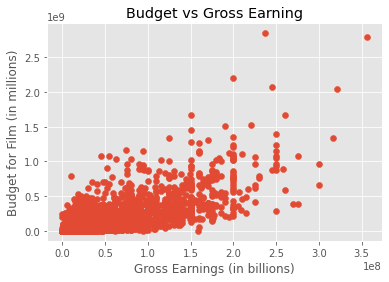

In [ ]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings (in billions)')
plt.ylabel('Budget for Film (in millions)')
plt.show()

In [ ]:
df.head()

name  ... runtime
5445                                      Avatar  ...     162
7445                           Avengers: Endgame  ...     181
3045                                     Titanic  ...     194
6663  Star Wars: Episode VII - The Force Awakens  ...     138
7244                      Avengers: Infinity War  ...     149

[5 rows x 15 columns]

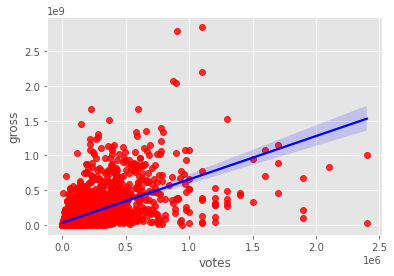

In [ ]:
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color': 'red'},
            line_kws={'color':'blue'})

In [ ]:
# CHECK THE CORRELATION
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.055053  0.205618  0.327543  0.274191  0.074106
score    0.055053  1.000000  0.473717  0.071638  0.221991  0.414502
votes    0.205618  0.473717  1.000000  0.439939  0.614848  0.352408
budget   0.327543  0.071638  0.439939  1.000000  0.740379  0.318572
gross    0.274191  0.221991  0.614848  0.740379  1.000000  0.275562
runtime  0.074106  0.414502  0.352408  0.318572  0.275562  1.000000

It shows here that there is a high correlation between gross and budget, there is also a good correaltion between gross and votes

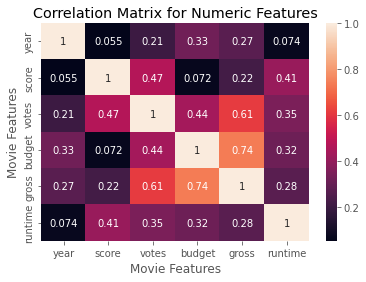

In [ ]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df.head()

name  ... runtime
5445                                      Avatar  ...     162
7445                           Avengers: Endgame  ...     181
3045                                     Titanic  ...     194
6663  Star Wars: Episode VII - The Force Awakens  ...     138
7244                      Avengers: Infinity War  ...     149

[5 rows x 15 columns]

In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype =='object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  ...     budget       gross  company  runtime
5445   387       5      0  2009  ...  237000000  2847246203     1388      162
7445   389       5      0  2019  ...  356000000  2797501328      987      181
3045  4920       5      6  1997  ...  200000000  2201647264     1388      194
6663  3654       5      0  2015  ...  245000000  2069521700      949      138
7244   390       5      0  2018  ...  321000000  2048359754      987      149
7480  4399       4      2  2019  ...  260000000  1670727580     1429      118
6653  2124       5      0  2015  ...  150000000  1670516444     1403      124
6043  3889       5      0  2012  ...  220000000  1518815515      987      143
6646  1545       5      0  2015  ...  190000000  1515341399     1403      137
7494  1534       4      2  2019  ...  150000000  1450026933     1428      103
6644   388       5      0  2015  ...  250000000  1402809540      987      141
7247   568       5      0  2018  ...  200000000  1347597973      987      134
5845  1736       5      1  2011  ...  125000000  1342321665     1432      130
7075  3655       5      0  2017  ...  317000000  1332698830     1429      152
7271  2125       5      0  2018  ...  170000000  1310466296     1403      128
6262  1533       4      2  2013  ...  150000000  1281508100     1428      102
7072   478       4      7  2017  ...  160000000  1264434525      980      129
7281  1972       4      2  2018  ...  200000000  1244639527     1429      118
7055  4130       5      0  2017  ...  250000000  1236005118     1403      136
6244  2020       5      0  2013  ...  200000000  1214811252      987      130
6688  2553       4      2  2015  ...   74000000  1159444662      823       91
6846   752       5      0  2016  ...  250000000  1153337496      987      147
7250   344       5      0  2018  ...  160000000  1148485886     1432      143
4245  4418       5      0  2003  ...   94000000  1146030912     1048      201
7458  3606       5      0  2019  ...  160000000  1131927996      454      129
7456   757       5      0  2019  ...  160000000  1128462972     1429      123
5878  4961       5      0  2011  ...  195000000  1123794079     1114      154
6059  3509       5      0  2012  ...  200000000  1108569499     1005      143
6494  4960       5      0  2014  ...  210000000  1104054072     1114      165
2448  4399       1      2  1994  ...   45000000  1083720877     1429       88
6047  4059       5      0  2012  ...  250000000  1081142612     1432      164
7463  3651       5      0  2019  ...  275000000  1078232589     1429      141
7450  2098       6      5  2019  ...   55000000  1074427370     1432      122
7488  4947       1      2  2019  ...  200000000  1073394593     1140      100
5685  4946       1      2  2010  ...  200000000  1066970811     1429      103
4852  2995       5      0  2006  ...  225000000  1066179747     1429      151
6869  3271       5      0  2016  ...  200000000  1056057720      949      133
7481   207       4      1  2019  ...  183000000  1050693953     1429      128
5860  2998       5      0  2011  ...  250000000  1045713802     1429      136
7140  1105       4      2  2017  ...   80000000  1034800131      823       89
2245  2122       5      0  1993  ...   63000000  1033928303     1403      127
6908  1415       4      2  2016  ...  200000000  1028570942     1140       97
3451  3648       4      0  1999  ...  115000000  1027082707      949      136
5667   216       4      1  2010  ...  200000000  1025468216     1429      108
6863  5341       4      2  2016  ...  150000000  1024121104     1429      108
6045  4251       5      1  2012  ...  180000000  1017003568     1005      169
3843  1741       4      1  2001  ...  125000000  1006968171     1432      152
5243  4058       5      0  2008  ...  185000000  1005973645     1432      152
6311  1104       4      2  2013  ...   76000000   970766005     1403       98
6905  4333       4      1  2016  ...  175000000   966554929      630      106
7051  2114       5      0  2

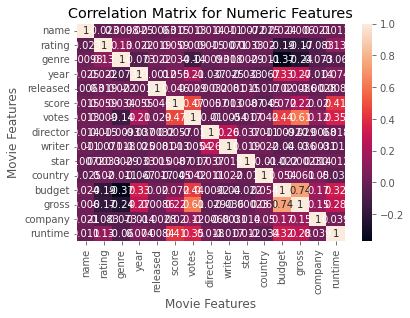

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df_numerized.corr()

name    rating     genre  ...     gross   company   runtime
name      1.000000 -0.022977  0.009775  ...  0.005992  0.021315  0.010702
rating   -0.022977  1.000000  0.128308  ... -0.169107 -0.083177  0.133146
genre     0.009775  0.128308  1.000000  ... -0.244446 -0.073024 -0.060057
year      0.024536  0.022113 -0.072664  ...  0.274191 -0.014204  0.074106
released -0.006265  0.018906  0.021902  ...  0.008623 -0.002796  0.008424
score     0.014886  0.059215  0.034039  ...  0.221991  0.020471  0.414502
votes     0.012946  0.008981 -0.136494  ...  0.614848  0.118988  0.352408
director  0.013625  0.015113 -0.009349  ... -0.029263 -0.006849  0.018078
writer    0.011339 -0.007102  0.018108  ... -0.036043 -0.003066 -0.016892
star     -0.007202  0.003262  0.002931  ... -0.000231  0.014213  0.012236
country  -0.024579  0.020310 -0.010826  ...  0.061025  0.049871 -0.033517
budget    0.023754 -0.187279 -0.368902  ...  0.740379  0.170947  0.318572
gross     0.005992 -0.169107 -0.244446  ...  1.000000  0.149943  0.275562
company   0.021315 -0.083177 -0.073024  ...  0.149943  1.000000  0.038541
runtime   0.010702  0.133146 -0.060057  ...  0.275562  0.038541  1.000000

[15 rows x 15 columns]

In [39]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.022977
          genre       0.009775
          year        0.024536
          released   -0.006265
          score       0.014886
          votes       0.012946
          director    0.013625
          writer      0.011339
          star       -0.007202
          country    -0.024579
          budget      0.023754
          gross       0.005992
          company     0.021315
          runtime     0.010702
rating    name       -0.022977
          rating      1.000000
          genre       0.128308
          year        0.022113
          released    0.018906
          score       0.059215
          votes       0.008981
          director    0.015113
          writer     -0.007102
          star        0.003262
          country     0.020310
          budget     -0.187279
          gross      -0.169107
          company    -0.083177
          runtime     0.133146
genre     name        0.009775
          rating      0.128308
        

In [40]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368902
budget    genre      -0.368902
genre     gross      -0.244446
gross     genre      -0.244446
rating    budget     -0.187279
budget    rating     -0.187279
rating    gross      -0.169107
gross     rating     -0.169107
votes     genre      -0.136494
genre     votes      -0.136494
rating    company    -0.083177
company   rating     -0.083177
genre     company    -0.073024
company   genre      -0.073024
genre     year       -0.072664
year      genre      -0.072664
country   year       -0.066576
year      country    -0.066576
genre     runtime    -0.060057
runtime   genre      -0.060057
country   score      -0.044534
score     country    -0.044534
writer    budget     -0.039580
budget    writer     -0.039580
year      director   -0.036615
director  year       -0.036615
writer    gross      -0.036043
gross     writer     -0.036043
runtime   country    -0.033517
country   runtime    -0.033517
year      star       -0.033368
star      year       -0.033368
gross   

In [41]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614848
votes     gross       0.614848
budget    gross       0.740379
gross     budget      0.740379
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64